In [1]:
import sys
sys.path.append('/home/stav/Projects/token_voken')

In [2]:
sys.executable

'/usr/bin/python3.8'

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.common.path_resolvers import resolve_interval_facial_embeddings_dir, resolve_interval_facial_embedding_path
from src.common.data_loader import load_valid_intervals
from src.common.constants import DF_INTERVALS_OLIVER, DF_INTERVALS_NOAH, EMBEDDING_EXTENSION

In [4]:
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
COL_SPEAKER   = 'speaker'
COL_DATASET   = 'dataset'
COL_WORD      = 'word'
COL_TOKEN     = 'bert_token'
COL_TOKEN_ID  = 'token_id'
COL_VOKEN     = 'voken'
COL_VIDEO     = 'video_id'
COL_INTERVAL  = 'interval_id'
COL_FRAME_ID  = 'selected_frame'

COLS_VIEW     = [COL_WORD, COL_TOKEN, COL_TOKEN_ID, COL_VOKEN]

In [9]:
DATA_DIR = '/home/stav/Data/PATS_DATA/Videos'

In [10]:
#TODO: use path resolvers
def get_frame_path(speaker_name, video_id, interval_id, frame_id):
    return f'{speaker_name}/{video_id}/{interval_id}/Faces/{frame_id:05d}.jpg'

In [11]:
dataset_path = '/home/stav/Data/Vokenization/Datasets/Oliver_V3_Noah_V1/df_token_voken_pkl.csv'
df_token_voken = pd.read_pickle(dataset_path)
df_token_voken[COL_SPEAKER].value_counts().astype('float64').to_frame()

,speaker
noah,"162,625"
oliver,"81,712"


In [12]:
df_token_voken.groupby([COL_SPEAKER, COL_DATASET]).size()\
    .astype('float64').to_frame()\
    .rename(columns={0: 'words'})

words
speaker dataset        
noah    test     32,393
        train   130,232
oliver  test     16,999
        train    64,713

In [13]:
df_token_voken.reset_index(drop=True, inplace=True)

In [14]:
train_videos = df_token_voken[(df_token_voken['speaker']=='oliver') & (df_token_voken['dataset']=='train')].video_id.unique()
test_videos = df_token_voken[(df_token_voken['speaker']=='oliver') & (df_token_voken['dataset']=='test')].video_id.unique()

In [16]:
len(train_videos), len(test_videos), len(set(train_videos) & set(test_videos))

(96, 27, 0)

In [17]:
df_token_voken[df_token_voken['word']=='love'].index

Int64Index([     0,    599,   8850,  11245,  12323,  14422,  16891,  18241,
             19780,  22983,
            ...
            234247, 234251, 238747, 239067, 239257, 239264, 239849, 240151,
            240155, 243711],
           dtype='int64', length=129)

In [18]:
df_token_voken.columns

Index(['word', 'bert_token', 'token_id', 'selected_frame', 'start_frame',
       'end_frame', 'start_char', 'end_char', 'interval_id', 'video_id',
       'voken', 'voken_path', 'voken_id', 'speaker', 'dataset'],
      dtype='object')

In [19]:
i = 234247 # i love the weasther i love the beach
df_token_voken.iloc[i-5:i+10][COLS_VIEW]

,word,bert_token,token_id,voken
234242,I,i,1045,"[-0.04975778, -0.094642766, -0.18715975, -0.19..."
234243,love,love,2293,"[-0.14476036, -0.085208766, -0.4042121, -0.168..."
234244,the,the,1996,"[-0.08335903, -0.11373753, -0.24971971, -0.113..."
234245,weather,weather,4633,"[-0.10840941, -0.056195047, -0.2570792, -0.061..."
234246,I,i,1045,"[0.1367389, -0.030969903, -0.18351233, -0.1221..."
234247,love,love,2293,"[-0.023654323, -0.10942306, -0.15590012, -0.12..."
234248,the,the,1996,"[0.070360444, -0.12631448, -0.054784097, -0.13..."
234249,beach,beach,3509,"[0.09354608, -0.20407194, -0.21534109, -0.1797..."
234250,I,i,1045,"[-0.011909006, -0.16966277, -0.08091955, -0.16..."
234251,love,love,2293,"[-0.05801701, -0.12471531, 0.0419753, 0.058500..."


In [20]:
EVERY_N = 1000

df_embeddings = df_token_voken.iloc[::EVERY_N][[COL_SPEAKER, COL_VIDEO, COL_INTERVAL, COL_FRAME_ID, COL_VOKEN]]
df_embeddings.rename(columns={COL_VOKEN: 'embedding', COL_FRAME_ID: 'frame_id'}, inplace=True)
df_embeddings['embedding_path'] = df_embeddings.apply(
    lambda row: get_frame_path(row[COL_SPEAKER], row[COL_VIDEO], row[COL_INTERVAL], row['frame_id']), axis=1)

In [21]:
df_embeddings.head()

,speaker,video_id,interval_id,frame_id,embedding,embedding_path
0,oliver,0Rnq1NpHdmw,104075,0,"[-0.020558793, 0.027756695, -0.31540206, -0.22...",oliver/0Rnq1NpHdmw/104075/Faces/00000.jpg
1000,oliver,1Y1ya-yF35g,103295,35,"[-0.06958624, -0.07348434, -0.3253747, -0.2248...",oliver/1Y1ya-yF35g/103295/Faces/00035.jpg
2000,oliver,1ZNZY-gd3K0,102691,291,"[0.0669865, -0.1405738, -0.13393153, -0.242033...",oliver/1ZNZY-gd3K0/102691/Faces/00291.jpg
3000,oliver,3bxcc3SM_KA,102448,0,"[0.10157911, -0.026549913, -0.19454384, -0.243...",oliver/3bxcc3SM_KA/102448/Faces/00000.jpg
4000,oliver,4U2eDJnwz_s,214844,16,"[0.079828225, -0.06580582, -0.28483784, -0.223...",oliver/4U2eDJnwz_s/214844/Faces/00016.jpg


In [33]:
df_embeddings.iloc[::20]

,speaker,video_id,interval_id,frame_id,embedding,embedding_path,embeddings_2d
0,oliver,0Rnq1NpHdmw,104075,0,"[-0.020558793, 0.027756695, -0.31540206, -0.22...",oliver/0Rnq1NpHdmw/104075/Faces/00000.jpg,"[0.5059028, -0.012293289]"
20000,oliver,DnpO_RTSNmQ,214835,156,"[-0.0015389794, -0.084214084, -0.2716528, -0.1...",oliver/DnpO_RTSNmQ/214835/Faces/00156.jpg,"[0.3815189, 0.009489626]"
40000,oliver,VdLf4fihP78,215981,357,"[0.22483484, -0.05020189, -0.28371376, -0.2317...",oliver/VdLf4fihP78/215981/Faces/00357.jpg,"[0.34887394, -0.024717515]"
60000,oliver,hkZir1L7fSY,215155,405,"[0.1613795, -0.092216216, -0.16322301, -0.2474...",oliver/hkZir1L7fSY/215155/Faces/00405.jpg,"[0.36613023, 0.017860692]"
80000,oliver,zNdkrtfZP8I,104014,374,"[0.17433113, -0.058099955, -0.24352495, -0.238...",oliver/zNdkrtfZP8I/104014/Faces/00374.jpg,"[0.44099855, 0.01008036]"
100000,noah,598zN40zTpU,cmu0000034721,508,"[-0.058940895, -0.24467164, -0.08684084, -0.04...",noah/598zN40zTpU/cmu0000034721/Faces/00508.jpg,"[-0.3074351, 0.10744539]"
120000,noah,CHImlpUxg9w,cmu0000041747,295,"[-0.18150686, -0.15143633, -0.21786624, 0.0196...",noah/CHImlpUxg9w/cmu0000041747/Faces/00295.jpg,"[-0.22462457, -0.06364749]"
140000,noah,LiPjWUn-PUo,cmu0000034155,5,"[0.17166997, -0.084727116, -0.20588972, -0.203...",noah/LiPjWUn-PUo/cmu0000034155/Faces/00005.jpg,"[0.33015937, 0.22450192]"
160000,noah,V6mQYfrbuDQ,cmu0000036047,305,"[-0.08279903, -0.06000945, -0.14482898, -0.121...",noah/V6mQYfrbuDQ/cmu0000036047/Faces/00305.jpg,"[-0.04988717, 0.01980296]"
180000,noah,anMWTH1LRZg,cmu0000042096,109,"[-0.24690075, -0.10253373, -0.24676046, -0.026...",noah/anMWTH1LRZg/cmu0000042096/Faces/00109.jpg,"[-0.07946761, -0.07703385]"


## PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [23]:
X = df_embeddings['embedding'].tolist()
X = np.stack(X, axis=0)
X_new = pca.fit_transform(X)
print(f'X shape: {X.shape} -> {X_new.shape}')

X shape: (245, 16) -> (245, 2)


In [24]:
df_embeddings['embeddings_2d'] = list(X_new)

In [25]:
df_sample = df_embeddings#.sample(n=500).copy()

In [26]:
X_sample = np.stack(df_sample['embeddings_2d'].tolist())

### 2D Visualization

In [27]:
import cv2

In [28]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.titlesize'] = 20

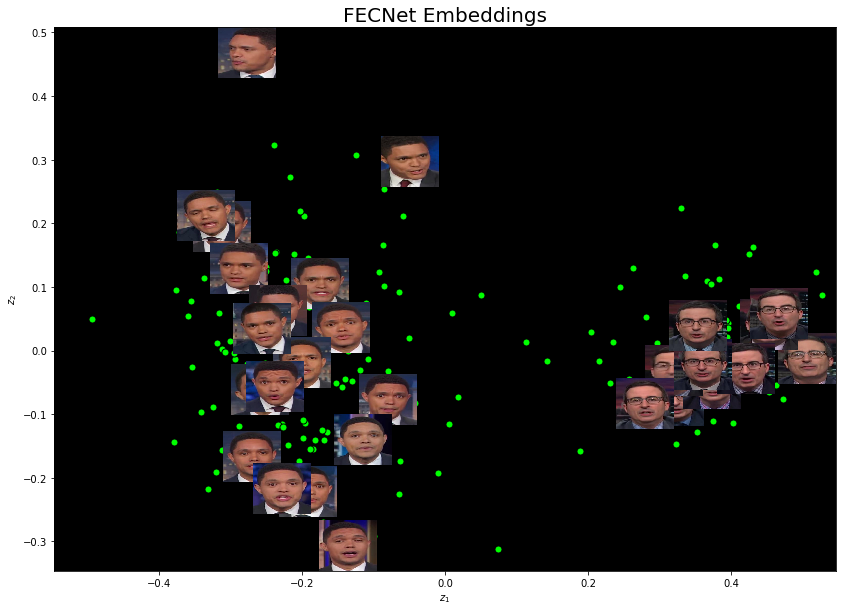

In [29]:
fig = plt.figure(figsize=(14, 10))

ignored = []

size = 0.04
for idx in range(0, len(df_sample), 9):
    img_path = os.path.join(DATA_DIR, df_sample.iloc[idx]['embedding_path'])
    if not os.path.exists(img_path):
        ignored.append(img_path)
        continue
    im = cv2.imread(img_path)
    x0  = X_sample[idx,0] - size
    x1  = X_sample[idx,0] + size
    y0  = X_sample[idx,1] - size
    y1  = X_sample[idx,1] + size
#     mI  = np.reshape(mX[idx,:], vShape).T
    RGBimage = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(RGBimage, aspect='auto', zorder=1, extent=(x0, x1, y0, y1))
#     plt.imshow(im, aspect='auto', cmap='gray', zorder=1, extent=(x0, x1, y0, y1))

plt.scatter(X_sample[:,0], X_sample[:,1], s=50, c='lime', edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('FECNet Embeddings')
plt.show()

In [163]:
from IPython.display import Image, display

____idx=0, path=/home/stav/Data/PATS_DATA/Videos/oliver/0Rnq1NpHdmw/104075/Faces/00000.jpg


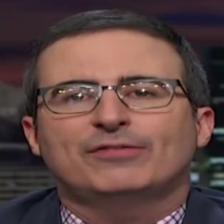

____idx=9, path=/home/stav/Data/PATS_DATA/Videos/oliver/7-LPcVo7gC0/103528/Faces/00043.jpg


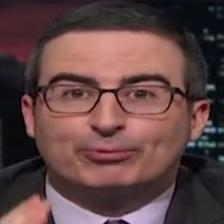

____idx=18, path=/home/stav/Data/PATS_DATA/Videos/oliver/CesHr99ezWE/103980/Faces/00153.jpg


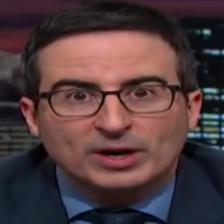

____idx=27, path=/home/stav/Data/PATS_DATA/Videos/oliver/K4NRJoCNHIs/216848/Faces/00332.jpg


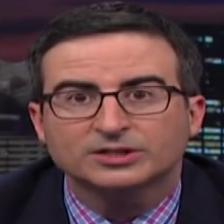

____idx=36, path=/home/stav/Data/PATS_DATA/Videos/oliver/QplQL5eAxlY/103302/Faces/00098.jpg


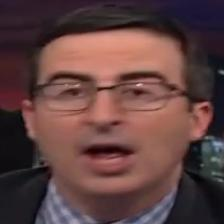

____idx=45, path=/home/stav/Data/PATS_DATA/Videos/oliver/YQZ2UeOTO3I/101665/Faces/00055.jpg


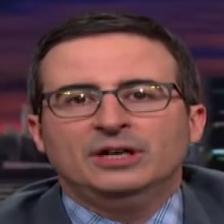

____idx=54, path=/home/stav/Data/PATS_DATA/Videos/oliver/boI4D1FlIVs/104734/Faces/00159.jpg


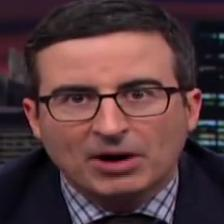

____idx=63, path=/home/stav/Data/PATS_DATA/Videos/oliver/i8xwLWb0lLY/214804/Faces/00065.jpg


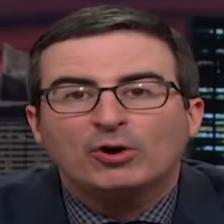

____idx=72, path=/home/stav/Data/PATS_DATA/Videos/oliver/rHFOwlMCdto/104668/Faces/00165.jpg


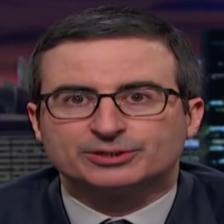

____idx=81, path=/home/stav/Data/PATS_DATA/Videos/oliver/zsjZ2r9Ygzw/216378/Faces/00481.jpg


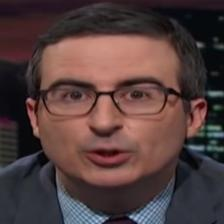

____idx=90, path=/home/stav/Data/PATS_DATA/Videos/noah/25w439VNqTw/cmu0000036273/Faces/00083.jpg


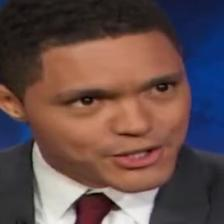

____idx=99, path=/home/stav/Data/PATS_DATA/Videos/noah/4UWAM6mBJD0/cmu0000035447/Faces/00233.jpg


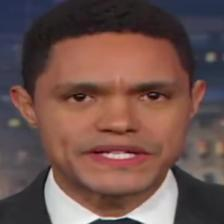

____idx=108, path=/home/stav/Data/PATS_DATA/Videos/noah/7CkmLsyvutg/cmu0000034377/Faces/00003.jpg


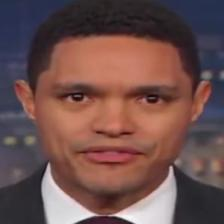

____idx=117, path=/home/stav/Data/PATS_DATA/Videos/noah/BB38DvTV5kc/cmu0000040983/Faces/00192.jpg


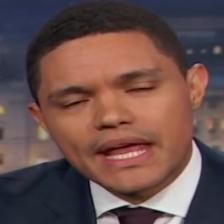

____idx=126, path=/home/stav/Data/PATS_DATA/Videos/noah/EDxCK4fi_sA/cmu0000040330/Faces/00004.jpg


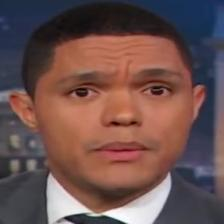

____idx=135, path=/home/stav/Data/PATS_DATA/Videos/noah/Hk5Z_9lPeZ0/cmu0000041845/Faces/00079.jpg


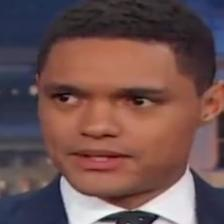

____idx=144, path=/home/stav/Data/PATS_DATA/Videos/noah/NKrrGpoiqSk/cmu0000035129/Faces/00096.jpg


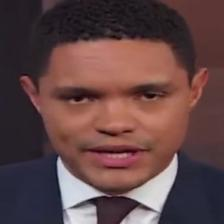

____idx=153, path=/home/stav/Data/PATS_DATA/Videos/noah/RlX0q4IaGA0/cmu0000040789/Faces/00364.jpg


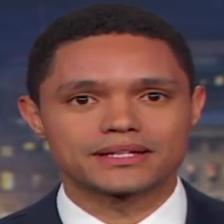

____idx=162, path=/home/stav/Data/PATS_DATA/Videos/noah/WFn55BBOFI0/cmu0000042489/Faces/00152.jpg


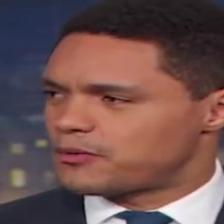

____idx=171, path=/home/stav/Data/PATS_DATA/Videos/noah/Z7msRhXgKXk/cmu0000040553/Faces/00016.jpg


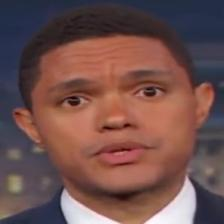

____idx=180, path=/home/stav/Data/PATS_DATA/Videos/noah/anMWTH1LRZg/cmu0000042096/Faces/00109.jpg


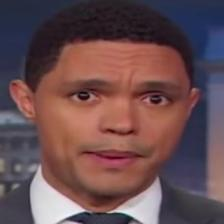

____idx=189, path=/home/stav/Data/PATS_DATA/Videos/noah/e63XbdGBxAg/cmu0000040059/Faces/00350.jpg


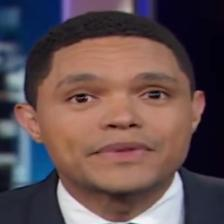

____idx=198, path=/home/stav/Data/PATS_DATA/Videos/noah/hw1RrmlrTtM/cmu0000042741/Faces/00095.jpg


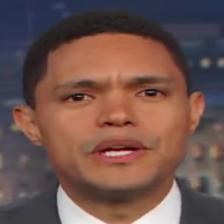

____idx=207, path=/home/stav/Data/PATS_DATA/Videos/noah/lIYa94IBWbY/cmu0000038938/Faces/00066.jpg


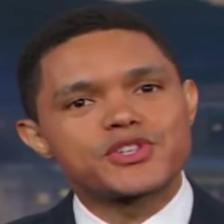

____idx=216, path=/home/stav/Data/PATS_DATA/Videos/noah/ot3cnM6VNLI/cmu0000034236/Faces/00129.jpg


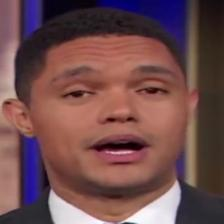

____idx=225, path=/home/stav/Data/PATS_DATA/Videos/noah/sOZIDDl3S6M/cmu0000038801/Faces/00557.jpg


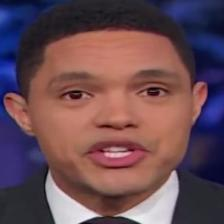

____idx=234, path=/home/stav/Data/PATS_DATA/Videos/noah/vsPAUBajtjs/cmu0000037724/Faces/00276.jpg


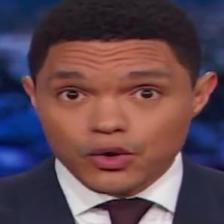

____idx=243, path=/home/stav/Data/PATS_DATA/Videos/noah/zNeGkBqMV2M/cmu0000035732/Faces/00382.jpg


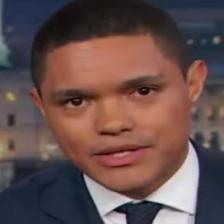

In [170]:
for idx in range(0, len(df_sample), 9):
    img_path = os.path.join(DATA_DIR, df_sample.iloc[idx]['embedding_path'])
    print(f'____idx={idx}, path={img_path}')
    display(Image(img_path))

In [171]:
# display(Image('/home/stav/Data/PATS_DATA/Videos/oliver/vU8dCYocuyI/216641/FacesAll/00050/annotated_faces.jpg'))